In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import tensorflow as tf
import functools
from matplotlib import pyplot as plt
import os
os.environ["CUDA_VISIBLE_DEVICES"]=""

from gantools import utils, plot, data, evaluation, blocks
from gantools.gansystem import GANsystem, UpcaleGANsystem
from gantools.model import WGAN, UpscalePatchWGAN


In [3]:
# number of sample generated
num_samples = 30

pathmodel = '../saved_results/'
pathsample = '../samples/maps'

In [7]:
dataset = data.load.load_maps_dataset(augmentation=None, spix=32, scaling=64)
images = dataset.get_all_data()

images shape =  (200, 2304, 2560, 3)


# Low res uniscale model

In [13]:
name = 'WGAN16_maps_scaling64_checkpoints'
def non_lin(x):
    return (tf.nn.tanh(x) + 1.0)/2.0
pathmodel_uniscale = os.path.join(pathmodel, name)
params_uniscale = utils.load_params(pathmodel_uniscale)

wgan_uniscale.net.params['shape']

[16, 16, 12]

In [16]:
wgan_uniscale = UpcaleGANsystem(UpscalePatchWGAN, params_uniscale)
gen_samples_uniscale = wgan_uniscale.upscale_image(N=num_samples, resolution=256)

Border block

--------------------------------------------------
     BORDER:  The input is of size (?, 16, 16, 9)
     BORDER: 0 Conv layer with 12 channels
         BORDER:  Size of the conv variables: (?, 8, 8, 12)
     BORDER: 1 Conv layer with 4 channels
         BORDER:  Size of the conv variables: (?, 8, 8, 4)
     BORDER:  Size of the conv variables: (?, 256)
--------------------------------------------------

Generator 
--------------------------------------------------
     The input is of size (?, 256)
     Contenate with latent variables to (?, 512)
     0 Full layer with 512 outputs
         Size of the variables: (?, 512)
     Reshape to (?, 16, 16, 2)
     0 Inception conv(1x1,3x3,5x5) layer with 16 channels
         Non linearity applied
         Size of the variables: (?, 16, 16, 48)
     1 Inception conv(1x1,3x3,5x5) layer with 16 channels
         Non linearity applied
         Size of the variables: (?, 16, 16, 48)
     2 Inception conv(1x1,3x3,5x5) layer with 16 ch

Checkpoint successfully loaded!
Current patch: column=1, row=1
Sampling z
Not loading a checkpoint
Current patch: column=1, row=2
Sampling z
Not loading a checkpoint
Current patch: column=1, row=3
Sampling z
Not loading a checkpoint
Current patch: column=1, row=4
Sampling z
Not loading a checkpoint
Current patch: column=1, row=5
Sampling z
Not loading a checkpoint
Current patch: column=1, row=6
Sampling z
Not loading a checkpoint
Current patch: column=1, row=7
Sampling z
Not loading a checkpoint
Current patch: column=1, row=8
Sampling z
Not loading a checkpoint
Current patch: column=1, row=9
Sampling z
Not loading a checkpoint
Current patch: column=1, row=10
Sampling z
Not loading a checkpoint
Current patch: column=1, row=11
Sampling z
Not loading a checkpoint
Current patch: column=1, row=12
Sampling z
Not loading a checkpoint
Current patch: column=1, row=13
Sampling z
Not loading a checkpoint
Current patch: column=1, row=14
Sampling z
Not loading a checkpoint
Current patch: column=1, 

Current patch: column=8, row=15
Sampling z
Not loading a checkpoint
Current patch: column=8, row=16
Sampling z
Not loading a checkpoint
Current patch: column=9, row=1
Sampling z
Not loading a checkpoint
Current patch: column=9, row=2
Sampling z
Not loading a checkpoint
Current patch: column=9, row=3
Sampling z
Not loading a checkpoint
Current patch: column=9, row=4
Sampling z
Not loading a checkpoint
Current patch: column=9, row=5
Sampling z
Not loading a checkpoint
Current patch: column=9, row=6
Sampling z
Not loading a checkpoint
Current patch: column=9, row=7
Sampling z
Not loading a checkpoint
Current patch: column=9, row=8
Sampling z
Not loading a checkpoint
Current patch: column=9, row=9
Sampling z
Not loading a checkpoint
Current patch: column=9, row=10
Sampling z
Not loading a checkpoint
Current patch: column=9, row=11
Sampling z
Not loading a checkpoint
Current patch: column=9, row=12
Sampling z
Not loading a checkpoint
Current patch: column=9, row=13
Sampling z
Not loading a 

Current patch: column=16, row=7
Sampling z
Not loading a checkpoint
Current patch: column=16, row=8
Sampling z
Not loading a checkpoint
Current patch: column=16, row=9
Sampling z
Not loading a checkpoint
Current patch: column=16, row=10
Sampling z
Not loading a checkpoint
Current patch: column=16, row=11
Sampling z
Not loading a checkpoint
Current patch: column=16, row=12
Sampling z
Not loading a checkpoint
Current patch: column=16, row=13
Sampling z
Not loading a checkpoint
Current patch: column=16, row=14
Sampling z
Not loading a checkpoint
Current patch: column=16, row=15
Sampling z
Not loading a checkpoint
Current patch: column=16, row=16
Sampling z
Not loading a checkpoint


In [17]:
os.makedirs(os.path.join(pathsample,'uniscale/'), exist_ok=True)
utils.save_hdf5(gen_samples_uniscale, os.path.join(pathsample,'uniscale/256_samples_ckpt_latest.h5'))

In [24]:
gen_samples_uniscale = wgan_uniscale.upscale_image(N=num_samples, resolution=32)

 [*] Reading checkpoints...
INFO:tensorflow:Restoring parameters from ../saved_results/WGAN16_maps_scaling64_checkpoints/upscale_patch_wgan-63000
Checkpoint successfully loaded!
Current patch: column=1, row=1
Sampling z
Not loading a checkpoint
Current patch: column=1, row=2
Sampling z
Not loading a checkpoint
Current patch: column=2, row=1
Sampling z
Not loading a checkpoint
Current patch: column=2, row=2
Sampling z
Not loading a checkpoint


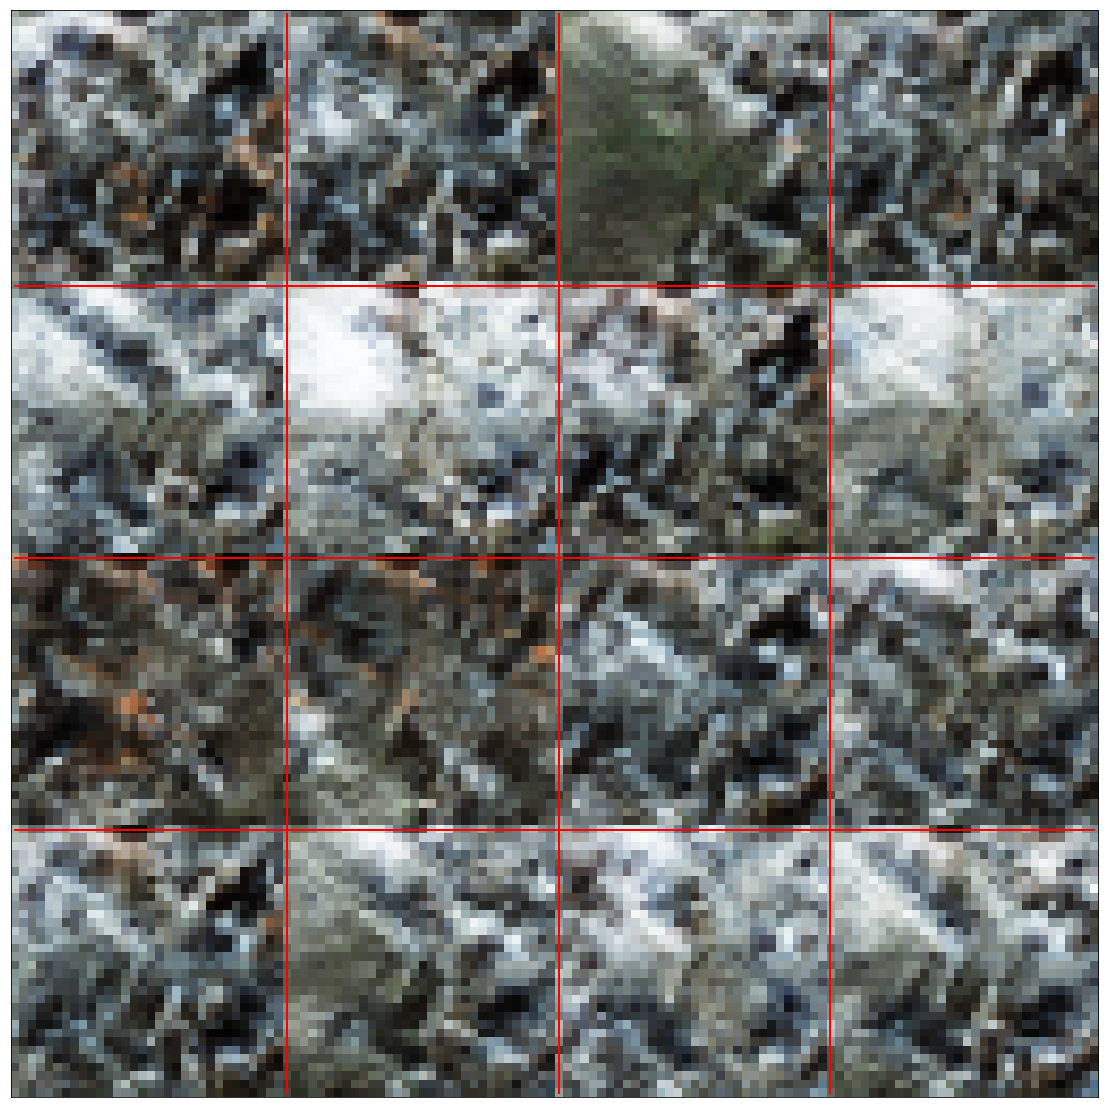

In [26]:
plt.figure(figsize=(20,20))
plot.draw_images(gen_samples_uniscale, nx=4, ny=4)

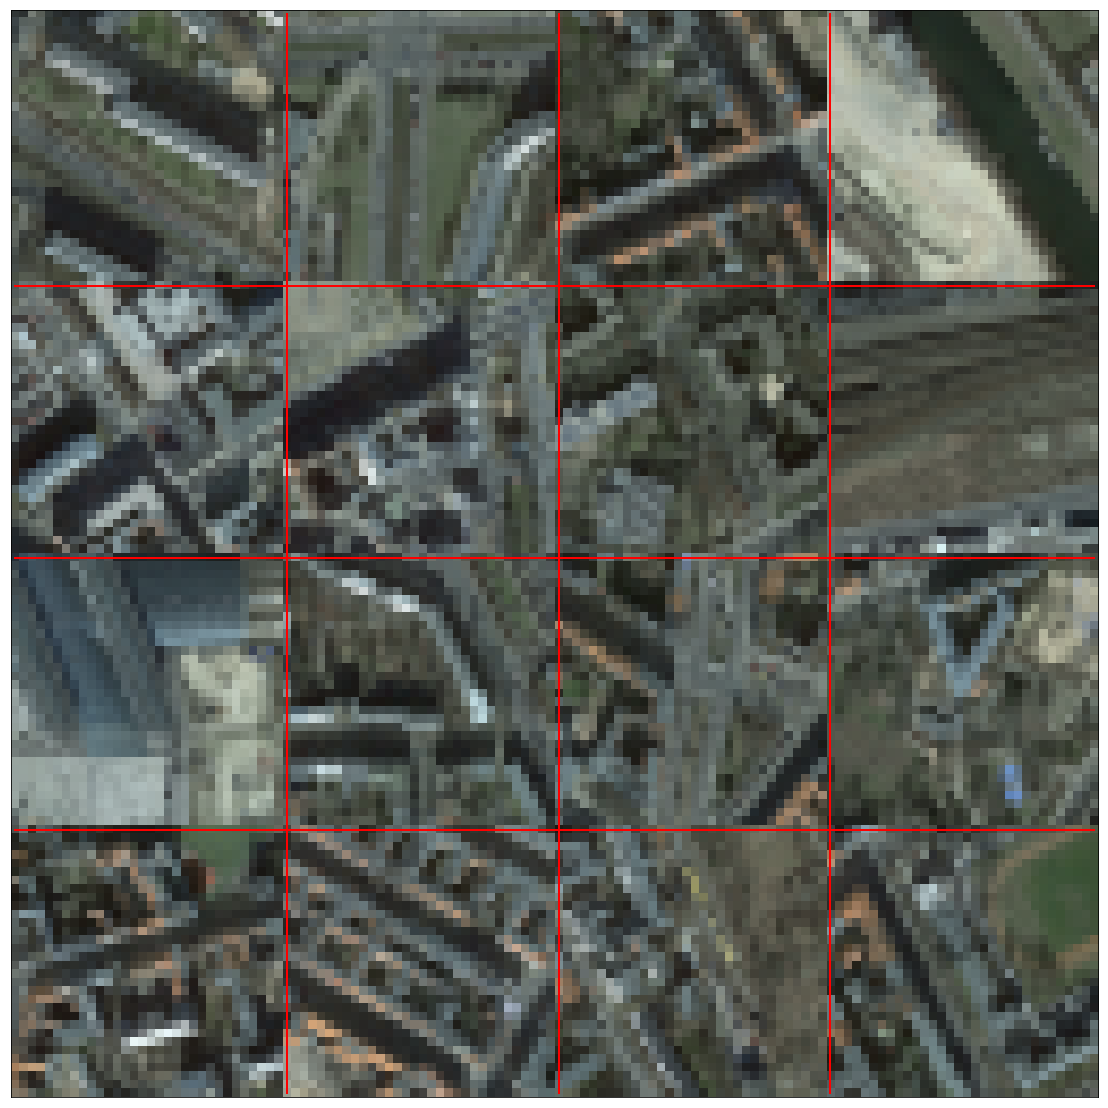

In [27]:
plt.figure(figsize=(20,20))
plot.draw_images(images, nx=4, ny=4)

# Make the figures for the paper

In [ ]:
pathfig = 'figures/'
os.makedirs(pathfig, exist_ok=True)

#### Load all samples

In [ ]:
gen_samples_32 = utils.load_hdf5(os.path.join(pathsample,'0_32/32_samples_ckpt_latest.h5'))
gen_samples_64 = utils.load_hdf5(os.path.join(pathsample,'32_64/64_samples_ckpt_latest.h5'))
gen_samples_256 = utils.load_hdf5(os.path.join(pathsample,'64_256/256_samples_ckpt_latest.h5'))
gen_samples_uniscale = utils.load_hdf5(os.path.join(pathsample,'uniscale/256_samples_ckpt_latest.h5'))


#### Backward transform

In [ ]:
gen_samples_32_raw = backward(gen_samples_32)
gen_samples_64_raw = backward(gen_samples_64)
gen_samples_256_raw = backward(gen_samples_256)


In [ ]:
# specialpath = '/store/nati/archive/cosmosamples/uniscale/256_samples_ckpt_latest.h5'
# gen_samples_uniscale = utils.load_hdf5(specialpath)

In [ ]:
gen_samples_uniscale_raw = backward_uniscale(gen_samples_uniscale)


#### Load real data

In [ ]:
dataset256 = data.load.load_dataset(resolution=256,Mpch=350,shuffle=False,forward_map=forward,spix=256,patch=False,is_3d=True,augmentation=False)
real_samples_256 = dataset256.get_all_data()
del dataset256


In [ ]:
real_samples_256_raw = backward(real_samples_256)

In [ ]:
dataset32 = data.load.load_dataset(resolution=256,Mpch=350,shuffle=False,forward_map=forward,spix=32,patch=False,is_3d=True,augmentation=False, scaling=8)
real_samples_32 = dataset32.get_all_data()
del dataset32

In [ ]:
real_samples_32_raw = backward(real_samples_32)

In [ ]:
dataset64 = data.load.load_dataset(resolution=256,Mpch=350,shuffle=False,forward_map=forward,spix=64,patch=False,is_3d=True,augmentation=False, scaling=4)
real_samples_64 = dataset64.get_all_data()
del dataset64

In [ ]:
real_samples_64_raw = backward(real_samples_64)

In [ ]:
# cmin = np.min(cubes)
# cmax = np.max(cubes)/1.5
cmin = 0
cmax = 3
clim = (cmin, cmax)
fig = plot_cubes_paper(real_samples_256, cmap=plt.cm.plasma, clim=clim);
fig.suptitle('Real $256^3$', y=1.02, fontsize=24 )
plt.savefig(pathfig+"real256.pdf", bbox_inches='tight', format='pdf')

fig2 = plot_cubes_paper(gen_samples_256, cmap=plt.cm.plasma, clim=clim);
fig2.suptitle('Fake $256^3$', y=1.02, fontsize=24 )
plt.savefig(pathfig+"fake256.pdf", bbox_inches='tight', format='pdf')



In [ ]:
logel2, l2, logel1, l1 = evaluation.compute_and_plot_mass_hist(real_samples_256_raw, gen_samples_256_raw)
plt.savefig(pathfig+"256full_hist.pdf", bbox_inches='tight', format='pdf')

In [ ]:
logel2, l2, logel1, l1 = evaluation.compute_and_plot_peak_cout(real_samples_256_raw, gen_samples_256_raw)
plt.savefig(pathfig+"256full_peak.pdf", bbox_inches='tight', format='pdf')

In [ ]:
evaluation.compute_and_plot_psd(real_samples_256_raw, gen_samples_256_raw)
plt.savefig(pathfig+"256full_psd.pdf", bbox_inches='tight', format='pdf')

# Scale by scale analysis

## 32 cubes

In [ ]:
# cmin = np.min(cubes_32)
# # cmin = 0
# cmax = np.max(cubes_32)
cmin = 0.1
cmax = 1.3
clim = (cmin, cmax)
fig = plot_cubes_paper(real_samples_32, cmap=plt.cm.plasma, clim=clim, nx=4, ny=4);
fig.suptitle('Real $32^3$', y=1.03, fontsize=48 )
plt.savefig(pathfig+"real32.pdf", bbox_inches='tight', format='pdf')

fig2 = plot_cubes_paper(gen_samples_32, cmap=plt.cm.plasma, clim=clim, nx=4, ny=4);
fig2.suptitle('Fake $32^3$', y=1.03, fontsize=48 )
plt.savefig(pathfig+"fake32.pdf", bbox_inches='tight', format='pdf')



In [ ]:
logel2, l2, logel1, l1 = evaluation.compute_and_plot_mass_hist(real_samples_32_raw, gen_samples_32_raw)
plt.savefig(pathfig+"32_hist.pdf", bbox_inches='tight', format='pdf')

In [ ]:
logel2, l2, logel1, l1 = evaluation.compute_and_plot_peak_cout(real_samples_32_raw, gen_samples_32_raw)
plt.savefig(pathfig+"32_peak.pdf", bbox_inches='tight', format='pdf')

In [ ]:
evaluation.compute_and_plot_psd(real_samples_32_raw, gen_samples_32_raw)
plt.savefig(pathfig+"32_psd.pdf", bbox_inches='tight', format='pdf')

## 64 Cubes

In [ ]:
name = '32_to_64'
class CosmoUpscalePatchWGAN(UpscalePatchWGAN, CosmoWGAN):
    pass

pathmodel64 = os.path.join(pathmodel, name)
params_64 = utils.load_params(pathmodel64)
wgan_64 = UpcaleGANsystem(CosmoUpscalePatchWGAN, params_64)
gen_samples_64_single = wgan_64.upscale_image(small=np.reshape(real_samples_32, [*real_samples_32.shape,1]))

In [ ]:
gen_samples_64_single_raw = backward(gen_samples_64_single)

In [ ]:
# cmin = np.min(cubes_64)
# cmax = np.max(cubes_64)
cmin = 0
cmax = 1.6
clim = (cmin, cmax)
fig = plot_cubes_paper(real_samples_64, cmap=plt.cm.plasma, clim=clim);
fig.suptitle('Real $64^3$', y=1.04, fontsize=36 )
plt.savefig(pathfig+"up_real64.pdf", bbox_inches='tight', format='pdf')

fig2 = plot_cubes_paper(gen_samples_64_single, cmap=plt.cm.plasma, clim=clim);
fig2.suptitle('Fake $64^3$', y=1.04, fontsize=36 )
plt.savefig(pathfig+"up_fake64.pdf", bbox_inches='tight', format='pdf')

fig = plot_cubes_paper(real_samples_32, cmap=plt.cm.plasma, clim=clim);
fig.suptitle('Real downsampled $32^3$', y=1.04, fontsize=36 )
plt.savefig(pathfig+"up_down32.pdf", bbox_inches='tight', format='pdf')

In [ ]:
logel2, l2, logel1, l1 = evaluation.compute_and_plot_mass_hist(real_samples_64_raw, gen_samples_64_single_raw)
plt.savefig(pathfig+"up_64_hist.pdf", bbox_inches='tight', format='pdf')

In [ ]:
logel2, l2, logel1, l1 = evaluation.compute_and_plot_peak_cout(real_samples_64_raw, gen_samples_64_single_raw)
plt.savefig(pathfig+"up_64_peak.pdf", bbox_inches='tight', format='pdf')

In [ ]:
evaluation.compute_and_plot_psd(real_samples_64_raw, gen_samples_64_single_raw)
plt.savefig(pathfig+"up_64_psd.pdf", bbox_inches='tight', format='pdf')

## 256 Cubes

In [ ]:
name = '64_to_256'
pathmodel256 = os.path.join(pathmodel, name)

params_256 = utils.load_params(pathmodel256)

wgan_256 = UpcaleGANsystem(CosmoUpscalePatchWGAN, params_256)
gen_samples_single_256 = wgan_256.upscale_image(small=np.reshape(real_samples_64, [*real_samples_64.shape, 1]))

In [ ]:
# cmin = np.min(cubes_256)
# cmax = np.max(cubes_256)/2.5
cmin = 0
cmax = 3
clim = (cmin, cmax)
fig = plot_cubes_paper(real_samples_256, cmap=plt.cm.plasma, clim=clim, ny=1);
fig.suptitle('Real $256^3$', y=1.03, fontsize=12 )
plt.savefig(pathfig+"up_real256.pdf", bbox_inches='tight', format='pdf')

fig2 = plot_cubes_paper(gen_samples_single_256, cmap=plt.cm.plasma, clim=clim, ny=1);
fig2.suptitle('Fake $256^3$', y=1.03, fontsize=12 )
plt.savefig(pathfig+"up_fake256.pdf", bbox_inches='tight', format='pdf')

fig = plot_cubes_paper(real_samples_64, cmap=plt.cm.plasma, clim=clim, ny=1);
fig.suptitle('Real downsampled $64^3$', y=1.03, fontsize=12 )
plt.savefig(pathfig+"up_down64.pdf", bbox_inches='tight', format='pdf')

In [ ]:
gen_samples_single_256_raw = backward(gen_samples_single_256)

In [ ]:
logel2, l2, logel1, l1 = evaluation.compute_and_plot_mass_hist(real_samples_256_raw, gen_samples_single_256_raw)
plt.savefig(pathfig+"up_256_hist.pdf", bbox_inches='tight', format='pdf')

In [ ]:
logel2, l2, logel1, l1 = evaluation.compute_and_plot_peak_cout(real_samples_256_raw, gen_samples_single_256_raw)
plt.savefig(pathfig+"up_256_peak.pdf", bbox_inches='tight', format='pdf')

In [ ]:
evaluation.compute_and_plot_psd(real_samples_256_raw, gen_samples_single_256_raw)
plt.savefig(pathfig+"up_256_psd.pdf", bbox_inches='tight', format='pdf')

## Uniscale

In [ ]:
cmin = 0
cmax = 3
clim = (cmin, cmax)
fig = plot_cubes_paper(real_samples_256, cmap=plt.cm.plasma, clim=clim);
fig.suptitle('Real $256^3$', y=1.02, fontsize=24 )
plt.savefig(pathfig+"uniscalereal256.pdf", bbox_inches='tight', format='pdf')

fig2 = plot_cubes_paper(gen_samples_uniscale, cmap=plt.cm.plasma, clim=clim, bkd=backward_uniscale);
fig2.suptitle('Fake $256^3 - uniscale$', y=1.02, fontsize=24 )
plt.savefig(pathfig+"uniscalefake256.pdf", bbox_inches='tight', format='pdf')

In [ ]:
logel2, l2, logel1, l1 = evaluation.compute_and_plot_mass_hist(real_samples_256_raw, gen_samples_uniscale_raw)
plt.savefig(pathfig+"256uniscale_hist.pdf", bbox_inches='tight', format='pdf')

In [ ]:
logel2, l2, logel1, l1 = evaluation.compute_and_plot_peak_cout(real_samples_256_raw, gen_samples_uniscale_raw)
plt.savefig(pathfig+"256uniscale_peak.pdf", bbox_inches='tight', format='pdf')

In [ ]:
evaluation.compute_and_plot_psd(real_samples_256_raw, gen_samples_uniscale_raw)
plt.savefig(pathfig+"256uniscale_psd.pdf", bbox_inches='tight', format='pdf')

# Gifs

## Real 256 cubes

In [ ]:
# fps=16
# clim = (0,3)
# plot.animate_cubes(real_samples_256, output_name=pathfig+"real256.gif", clim=clim, fps=fps, cmap=plt.cm.plasma)
# animation = plot.cubes_to_animation(real_samples_256, cmap=plt.cm.plasma, clim=clim)
# animation.ipython_display(fps=16, loop=True, autoplay=True)


In [ ]:
# plot.save_animation(real_samples_256[0], gen_samples_256[0], figsize=(10, 6), fps=16, format='mp4', output_file_name=pathfig+'final.mp4', clim=clim)
# plt.style.use('ggplot')